# Week 10: The Discrete Fourier Transform (DFT)

<font size="6"> Laboratory 9 </font> <br>
<font size="3"> Last updated April 17, 2023 </font>

## <span style="color:orange;"> 00. Content </span>

### Mathematics 
- Fourier series
- Euler's formula
- Sampling and Aliasing
- Periodicity of discrete-time complex exponentials
- Orthogonality of discrete complex harmonics exponentials
- Sampling theorem
    
### Programming Skills 
- Loops
- FFT function from numpy
### Embedded Systems 
- N/A

## <span style="color:orange;"> 0. Required Hardware </span>
- N/A

<h3 style="background-color:lightblue"> Write your name and email below: </h3>

**Name:** Aidan Leib 

**Email:** pleib@purdue.edu

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## <span style="color:orange;"> 1. Intro </span>

The signals we acquire in real-life have a finite duration. We typically assume that they "start at zero", meaning that they are equal to zero until $t=0$. After the signal duration is passed, i.e. when $t$ is greater than the duration of the signal, then we also assume that the signal is equal to zero. 

Putting this in mathematical terms: a finite duration signal $f(t)$ takes the form 

$$ f(t)=\left\{ \begin{array}{ll} f(t), & 0\leq t < \text{signal duration}, \\ 0, & \text{ else.}\end{array}  \right. $$

In order to analyze a finite duration signal, we repeat it periodically with a period $P$ that is at least as long as the duration of the signal (otherwise, the copies will overlap with each other and mess up the signal). When $P$ is strictly greater than the duration (so there is "space" in between the copies), we say that the signal has been "zero padded" between the repetitions. 

We assume that the repeated signal is such that it is equal to its Fourier series: 

$$f(t)= \frac{a_0}{2}+ \sum_{k=1}^\infty a_k \cos \left(\frac{2 \pi}{P} k t \right) + b_k \sin \left(\frac{2 \pi}{P} k t  \right).$$

We are interested in analyzing the signal $f(t)$. In real-life, we cannot do this directly by manipulating the function $f(t)$, as we typically only have access to a digital recording of $f(t)$. So, for example, computing the Fourier transform of $f(t)$ (by integration) is not possible. We would like to be able to perform the analysis of $f(t)$ by analysing its digital recording instead.

One important analysis to be performed is the recovery of the coefficients  $a_k,b_k$ from the digital recording. 


We assume that the digital recording takes the form of a discrete-time signal $f_d[n]$, with $n\in {\mathbb N}$, obtained by sampling the original signal $f(t)$. More specifically, we assume that $f_d[n]$ is a uniform sampling of $f(t)$:

$$f_d[n]=f(nT), \text{ for some } T>0.$$


The parameter $T$ is called the **sampling period**. The quantity $\frac{1}{T}$ is called the **sampling frequency**.   The sampling period $T$ is the time difference between two sample points, and the sampling frequency represent how many samples are acquired per time unit.    

In order to simplify the math, we rewrite $f(t)$ in terms of complex exponentials: 

$$ f(t)=  \sum_{k=-\infty}^\infty c_n e^{i \frac{2\pi}{P}nt} $$ 

where $ c_0=\frac{a_0}{2}$ and

\begin{equation}
c_n=
    \begin{cases}
        \frac{1}{2} (a_n- i b_n) & \text{for } n < 0\\
        \frac{1}{2} (a_n+ i b_n) & \text{for } n>1
    \end{cases}
\end{equation}

### <span style="color:red"> Exercise 1 </span>
Derive the above formula. (Hint: replace each sine and cosine by sums of complex exponentials. If you do not know the sums already, find them using Euler's formula $e^{i\theta}=\cos \theta + i \sin \theta$. B'Euler up! )

$$f(t)= \frac{a_0}{2}+ \sum_{k=1}^\infty a_k \cos \left(\frac{2 \pi}{P} k t \right) + b_k \sin \left(\frac{2 \pi}{P} k t  \right)$$

$$= \frac{a_0}{2} + \sum_{k=1}^\infty a_k \frac{e^{i \frac{2\pi}{P}kt} + e^{-i \frac{2\pi}{P}kt}}{2} + 
                                      b_k \frac{e^{i \frac{2\pi}{P}kt} - e^{-i \frac{2\pi}{P}kt}}{2i}$$

$$= c_0 + \sum_{k=1}^\infty \frac{1}{2}(a_k - ib_n) \left( e^{i \frac{2\pi}{P}kt} + e^{-i \frac{2\pi}{P}kt} 
                                                    + e^{i \frac{2\pi}{P}kt} - e^{-i \frac{2\pi}{P}kt}\right)$$

$$= \sum_{k=-\infty}^\infty c_n e^{i \frac{2\pi}{P}kt}$$

In the following, we will show how to recover the coefficients $a_k,b_k$ using the **Discrete Fourier Transform (DFT)** of the sampling $f_n[n]$. The DFT transforms a discrete-time periodic signal with period $N$ into a sequence of complex numbers that is also periodic with period $N$. The numbers in the sequence are called the **DFT coefficients.**

The formula for the $k^{th}$ DFT coefficient of a sampled signal $f_d[n]$ with period $N$ is

$$ F[k]= \sum_{n=0}^{N-1} f_d[n] e^{-i \frac{2 \pi}{N} k n }.  $$


As we will see later, in some circumstances, namely if
- the Fourier series of $f(t)$ is finite, that is to say if $c_k=0$ for all $|k|>K$, (i.e., a band-limited signal) and 
- $N$ is large enough,

then we have 

$$F[k]= N c_k, \text{ for all }0\leq k \leq K.$$ 

Therefore, in those circumstances, one can recover the Fourier series coefficients $a_k=2 (c_k+c_k^*)$, $b_k=2(c_k-c_k^*)$ of the signal $f(t)$ from the DFT coefficients of the sampled signal. The rest of the lab explores and clarifies this.


## <span style="color:orange;"> 2. Periodicity of the Sampling </span>

In order for the proposed analysis method to work, the sampled signal must be periodic. In other words, there must exist an integer $N$ such that 

$$ f_d[n+N] = f_d[n], \forall n.$$

Depending on the sampling period $T$ chosen, the sampled signal may or may not be periodic.

### <span style="color:red"> Exercise 2 </span>
If the signal $f(t)=e^{i \frac{2\pi}{10} t }$ is sampled with a sampling period $T=2$, show that the resulting sampling $f_d[n]=f(nT)$ is periodic with period $N=5$. (Use either code or mathematics.) 

$$f_d[n] = f_d[n + N]$$
$$f(2n) = f(2(n + N))$$
$$e^{i\frac{2\pi}{10}2n} = e^{i\frac{2\pi}{10}2(n + N)}$$

$$ cos(\frac{2\pi}{10}2n) - isin(\frac{2\pi}{10}2n) =  cos(\frac{2\pi}{10}2(n + N)) - isin(\frac{2\pi}{10}2(n + N))$$
$$ cos(\frac{2\pi}{5}n) - isin(\frac{2\pi}{5}n) =  cos(\frac{2\pi}{5}n + \frac{2\pi}{5}N) - isin(\frac{2\pi}{5}n + \frac{2\pi}{5}N)$$

$cos(x) = cos(x + 2\pi)$, therefore for the siganl to repeat,

$$cos(\frac{2\pi}{5}n) = cos(\frac{2\pi}{5}n + \frac{2\pi}{5}N)$$
$$\frac{2\pi}{5}N = 2\pi$$
$$N = 5$$

### <span style="color:red"> Exercise 3 </span> 
If the signal $f(t)=e^{i \frac{2\pi}{10} t }$ is sampled with a sampling period $T=3$, show that the resulting sampling $f_d[n]=f(nT)$ is periodic with period $N=10$. (Use either code or mathematics.)

$$f_d[n] = f_d[n + N]$$
$$f(3n) = f(3(n + N))$$
$$e^{i\frac{2\pi}{10}3n} = e^{i\frac{2\pi}{10}3(n + N)}$$

$$ cos(\frac{2\pi}{10}3n) - isin(\frac{2\pi}{10}3n) =  cos(\frac{2\pi}{10}3(n + N)) - isin(\frac{2\pi}{10}3(n + N))$$
$$ cos(\frac{\pi}{5}3n) - isin(\frac{\pi}{5}3n) =  cos(\frac{\pi}{5}3n + \frac{\pi}{5}3N) - isin(\frac{\pi}{5}3n + \frac{\pi}{5}3N)$$

$$cos(\frac{\pi}{5}3n) = cos(\frac{\pi}{5}3n + \frac{\pi}{5}3N)$$
$$\frac{\pi}{5}3N = 2\pi$$
$$N = \frac{10}{3}$$
$$LCM(\frac{10}{3}, 1) = 10$$

### <span style="color:red"> Exercise 4 </span> 
If the signal $f(t)=e^{i \frac{2\pi}{10} t }$ is sampled with a sampling period $T=\sqrt{2}$, show that the resulting sampling $f_d[n]=f(nT)$ is not periodic. (Here you must use mathematics.)

$$f_d[n] = f_d[n + N]$$
$$f(\sqrt{2}n) = f(\sqrt{2}(n + N))$$
$$e^{i\frac{2\pi}{10}\sqrt{2}n} = e^{i\frac{2\pi}{10}\sqrt{2}(n + N)}$$

$$e^{i\frac{2\pi}{10}\sqrt{2}n} = e^{i\frac{2\pi}{10}\sqrt{2}n} e^{i\frac{2\pi}{10}\sqrt{2}N}$$
$$1 = e^{i\frac{2\pi}{10}\sqrt{2}N}$$

Which implies a preiodic function with period = $\frac{2\pi}{10}\sqrt{2}N$

$$\frac{2\pi}{10}\sqrt{2}N = 2\pi k$$ for discrete signals

$$ N = \frac{10}{\sqrt{2}}k$$

$$LCM \left( \frac{10}{\sqrt{2}}, 1 \right) = DNE$$

In general, $f_d[n]= f(n T)$ is periodic  if an only if $\frac{P}{T}$ is a rational number. That means that we can write $\frac{P}{T}$ as a ratio of two integers:


$$\frac{P}{T}=\frac{N}{K}.$$ 


If $N$ and $K$ have no common factor, then $N$ is the fundamental period of $f_d[n]$. 

For example, if $T=\frac{P}{N}$, then we acquire $N$ samples per period, and $f_d[n]$ is periodic with period $N$. Similarly, if $T=\frac{2 P}{N}$, then we acquire $N$ samples per two periods, which corresponds to $\frac{N}{2}$ samples per period. If $N$ is odd, then $f_d[n]$ has period $N$ (it has to be an integer). If $N$ is even, $f_d[n]$ has period $\frac{N}{2}$.

## <span style="color:orange;"> 2. Toy Example of Signal Analysis </span>

Suppose the signal recorded, once repeated periorically, is of the form 

$$  f(t)= a_1 \cos \left(2 \pi 100 t \right) + a_4 \cos \left(2 \pi 400 t  \right). $$

So the signal has period $ P=\frac{1}{100} $.

Note: The Period of a linear combination of signals is the LCM of their individual periods.



Let us write $f_d[n]$ in terms of complex exponentials, using the formulas $\cos \theta = \frac{1}{2} (e^{i\theta}+e^{-i\theta})$ and $\sin \theta = \frac{1}{2i} (e^{i\theta}-e^{-i\theta})$: 


$$ f_d[n]= \frac{a_1}{2} \left(e^{i  2 \pi \frac{n}{10}}+ e^{-i 2 \pi \frac{n}{10}}\right) + \frac{a_4}{2}\left(e^{i 2 \pi  4 \frac{n}{10}}+ e^{-i 2 \pi 4 \frac{n}{10}}\right). $$


Given is a recording with 1000 samples per unit of time (so the sampling period is $T=\frac{1}{1000}$): 

$$ f_d[n] = f( n \frac{1} {1000}).$$

More specifically, the recorded signal is  

$$ \begin{aligned}
f_d[n]&= a_1 \cos \left(2 \pi 100 \frac{n} {1000} \right) + a_4 \cos \left(2 \pi 400  \frac{n} {1000}  \right)\\
&= a_1 \cos \left(2 \pi \frac{n}{10} \right) + a_4 \cos \left(2 \pi 4 \frac{n}{10} \right). 
\end{aligned} $$



Observe that $f_d[n]$ is periodic, with period $N=10$. This is because we are taking $10$ samples per period 

(since $\frac{P}{T}=\frac{1000}{100}=10$).

Now let us compute the first coefficient $F[1]$ of the 10-point DFT of $f_d[n]$.  

We have

$$
\begin{aligned}
F[1]&= \sum_{n=0}^{9} f_d[n]  e^{-i \frac{2\pi}{10} n} \\
&= \sum_{n=0}^{9} \left( \frac{a_1}{2} \left(e^{i 2 \pi \frac{n}{10}}+ e^{-i 2 \pi \frac{n}{10}}\right) 
+
\frac{a_4}{2}\left(e^{i 2 \pi  4 \frac{n}{10}}+ e^{-i 2 \pi 4 \frac{n}{10}}\right)\right)  e^{-i \frac{2\pi}{10}  n} \\
&= 10 \frac{a_1}{2}
\end{aligned}
$$

since complex exponentials have the following orthogonality property:

$$
\sum_{n=0}^{N-1} e^{j \frac{2\pi}{N} k_1 n } e^{j \frac{2\pi}{N} k_2 n } = \left\{ 
\begin{array}{ll}
    N &, \text{ if } k_1+k_2  \text{ is a multiple of } N  \\
   0  &, \text{ else}. 
\end{array}
\right.
$$

Therefore, $a_1=2 \frac{F[1]}{10}$. So we are able to obtain the value of $a_1$ from the value of $F[1]$.

### <span style="color:red"> Exercise 5 </span>
Test the formula $a_1=2 \frac{ F[1]}{10}$ as follows:

* Pick values of $a_1$ and $a_4$. (Do not pick the same value for both.)
* Replace the chosen values in the function $  f(t)= a_1 \cos \left(2 \pi 100 t \right) + a_4 \cos \left(2 \pi 400 t  \right)$.
* Sample the function $f(t)$ with a sampling period $T=1000^{-1}$ to obtain the sampling $ f_d[n]$.
* Compute $F[1]$ using the formula  $F[1]=\sum_{n=0}^{9} f_d[n]  e^{-i \frac{2\pi}{10} n}$.
* Compute $a_1$ using the formula $a_1=2 \frac{ F[1]}{10}$.
* Compare the value of $a_1$ you obtained to the original value of $a_1$ you had chosen. Is it the same?

$$a_1 = 1, a_4 = 4$$

$$f(t) = (1)\cos(2\pi 100t) + (4)\cos(2\pi 400t)$$

$$f_d[n] = \cos(2\pi 100 \frac{n}{1000}) + 4\cos(2\pi 400 \frac{n}{1000})$$

$$F[1] = \sum_{n=0}^{9} (\cos(2\pi 100 \frac{n}{1000}) + 4\cos(2\pi 400 \frac{n}{1000})) e^{-i \frac{2\pi}{10}n}$$

$$
F[1] = \sum_{n=0}^{9} \left( \frac{1}{2} (e^{i 2\pi \frac{n}{10}} + e^{-i 2\pi \frac{n}{10}}) + 2(e^{i 2\pi \frac{4n}{10}} 
+ e^{-i 2\pi \frac{4n}{10}}) \right) e^{-i \frac{2\pi}{10}}
$$

$$
F[1] = \sum_{n=0}^{9} \left( \frac{1}{2} (e^{i 2\pi \frac{n}{10}}e^{-i \frac{2\pi}{10}}
+ e^{-i 2\pi \frac{n}{10}}e^{-i \frac{2\pi}{10}})
+ 2(e^{i 2\pi \frac{4n}{10}}e^{-i \frac{2\pi}{10}} + e^{-i 2\pi \frac{4n}{10}}e^{-i \frac{2\pi}{10}}) \right)
$$

$$
\sum_{n=0}^{N-1} e^{j \frac{2\pi}{N} k_1 n } e^{j \frac{2\pi}{N} k_2 n } = \left\{ 
\begin{array}{ll}
    N &, \text{ if } k_1+k_2  \text{ is a multiple of } N  \\
   0  &, \text{ else}. 
\end{array}
\right.
$$

Therefore,
$$
F[1] = \sum_{n=0}^{9} \frac{1}{2} (e^{i 2\pi \frac{n}{10}}e^{-i \frac{2\pi}{10}} + e^{-i 2\pi \frac{n}{10}}e^{-i \frac{2\pi}{10}})
+ \sum_{n=0}^{9} 2(e^{i 2\pi \frac{4n}{10}}e^{-i \frac{2\pi}{10}} + e^{-i 2\pi \frac{4n}{10}}e^{-i \frac{2\pi}{10}})
$$

$$
F[1] = \frac{1}{2} \sum_{n=0}^{9} (e^{i 2\pi \frac{n}{10}}e^{-i \frac{2\pi}{10}} + e^{-i 2\pi \frac{n}{10}}e^{-i \frac{2\pi}{10}})
+ 0
$$

$$
F[1] = \frac{1}{2} N + 0
$$

$$F[1] = \frac{1}{2}10 = 5$$

Checking $a_1$ now...
$$a_1 = 2\frac{F[1]}{10}$$
$$a_1 = 2\frac{5}{10}$$
$$a_1 = 1$$

$a_1$ checks out

Similarly, we can recover $a_4$ from $F[4]$. We have

$$
\begin{aligned}
F[4]&= \sum_{n=0}^{9} f_d[n]  e^{-i \frac{2\pi}{10} 4 n} \\
&= \sum_{n=0}^{4} \left( \frac{a_1}{2} \left(e^{i 2 \pi \frac{n}{10}}+ e^{-i 2 \pi  \frac{n}{10}}\right) 
+
\frac{a_4}{2}\left(e^{i 2 \pi  4 \frac{n}{10}}+ e^{-i 2 \pi 4 \frac{n}{10}}\right)\right) e^{-i \frac{2\pi}{5} 4 n} \\
&= 10 \frac{a_4}{2},
\end{aligned}
$$ 

again by using the fact that 

$$
\sum_{n=0}^{N-1} e^{j \frac{2\pi}{N} k_1 n } e^{j \frac{2\pi}{N} k_2 n } = \left\{ 
\begin{array}{ll}
    N &, \text{ if } k_1+k_2  \text{ is a multiple of } N  \\
   0  &, \text{ else}. 
\end{array}
\right.
$$

Therefore, $a_4=2 \frac{F[4]}{10}$. So we are able to obtain the value of $a_4$ from the value of $F[4]$.


### <span style="color:red"> Exercise 6 </span> 
Test the formula $a_4=2 \frac{F[4]}{10}$ in the same was as you did for Exercise 5.

$$
F[4] = \sum_{n=0}^{9} \left( \frac{1}{2} (e^{i 2\pi \frac{n}{10}} + e^{-i 2\pi \frac{n}{10}}) + 2(e^{i 2\pi \frac{4n}{10}} 
+ e^{-i 2\pi \frac{4n}{10}}) \right) e^{-i \frac{2\pi}{10}4}
$$

$$
F[4] = \sum_{n=0}^{9} \left( \frac{1}{2} (e^{i 2\pi \frac{n}{10}}e^{-i \frac{2\pi}{10}4}
+ e^{-i 2\pi \frac{n}{10}}e^{-i \frac{2\pi}{10}4})
+ 2(e^{i 2\pi \frac{4n}{10}}e^{-i \frac{2\pi}{10}4} + e^{-i 2\pi \frac{4n}{10}}e^{-i \frac{2\pi}{10}4}) \right)
$$

$$
F[4] = 0 + \sum_{n=0}^{9} 2(e^{i 2\pi \frac{4n}{10}}e^{-i \frac{2\pi}{10}4} + e^{-i 2\pi \frac{4n}{10}}e^{-i \frac{2\pi}{10}4})
$$

$$
F[4] = 2\sum_{n=0}^{9} e^{i 2\pi \frac{4n}{10}}e^{-i \frac{2\pi}{10}4} + 2\sum_{n=0}^{9} e^{-i 2\pi \frac{4n}{10}}e^{-i \frac{2\pi}{10}4}
$$

$$
F[4] = 2N + 0 \\
F[4] = 2(10) = 20
$$

Checking $a_4$...
$$
a_4 = 2\frac{F[4]}{10} \\ 
a_4 = 2\frac{20}{10} \\
a_4 = 4
$$

$a_4$ Checks out just like $a_1$

## <span style="color:orange;"> 3. Another Toy Example of Signal Analysis- with Aliasing </span>

Again, we assume thay the signal recorded is known to be of the form

$$  f(t)= a_1 \cos \left(2 \pi 100 t \right) + a_4 \cos \left(2 \pi 400  t  \right). $$

So the signal has a period $P=\frac{1}{100}$.

But this time, we are given a recording with only 500 samples per unit of time (so the sampling period is $T=\frac{1}{500}$): 

$$ f_d[n] = f( n \frac{1} {500}).$$

More specifically, the recorded signal is

$$ 
\begin{aligned}
f_d[n]&= a_1 \cos \left(2 \pi 100 \frac{n} {500} \right) + a_4 \cos \left(2 \pi 400  \frac{n} {500}  \right)\\
&= a_1 \cos \left(2 \pi  \frac{n}{5} \right) + a_4 \cos \left(2 \pi 4 \frac{n}{5} \right). 
\end{aligned}
$$

Let us write $f_d[n]$ in terms of complex exponentials:

$$
\begin{aligned}
f_d[n]&= \frac{a_1}{2} \left(e^{i 2 \pi  \frac{n}{5}}+ e^{-i 2 \pi  \frac{n}{5}}\right) 
+
\frac{a_4}{2}\left(e^{i 2 \pi  4 \frac{n}{5}}+ e^{-i 2 \pi 4 \frac{n}{5}}\right).
\end{aligned}
$$

Here $f_d[n]$ is periodic with period $N=5$. This is because we are taking $5$ samples per signal period (since $\frac{P}{T}=\frac{500}{100}=5$).

Now let us compute the first coefficient $F[1]$ of the 5-point DFT of $f_d[n]$.  

We have 

$$
\begin{aligned}
F[1]&= \sum_{n=0}^{4} f_d[n]  e^{-i \frac{2\pi}{5} n} \\
&= \sum_{n=0}^{4} \left( \frac{a_1}{2} \left(e^{i 2 \pi \frac{n}{5}}+ e^{-i 2 \pi  \frac{n}{5}}\right) 
+
\frac{a_4}{2}\left(e^{i 2 \pi  4 \frac{n}{5}}+ e^{-i 2 \pi 4 \frac{n}{5}}\right)\right) e^{-i \frac{2\pi}{5} 4 n} \\
&= 5 \frac{a_1}{2} + 5 \frac{a_4}{2},
\end{aligned}
$$

again since

$$
\sum_{n=0}^{N-1} e^{j \frac{2\pi}{N} k_1 n } e^{j \frac{2\pi}{N} k_2 n } = \left\{ 
\begin{array}{ll}
    N &, \text{ if } k_1+k_2  \text{ is a multiple of } N  \\
   0  &, \text{ else}. 
\end{array}
\right.
$$

Thus, in this case, $F[1]$ does not give us the value of $a_1$ anymore, but rather only the sum of $a_1$ and $a_4$. 

The reason for this is fundamental: the function $e^{i 2 \pi  4 \frac{n}{5}}$ is the same as the function $e^{-i 2 \pi   \frac{n}{5}}$. So we cannot recover the coefficients separately because the two exponential signals, once sampled, become the same signal. Indeed, the sampled signal can be written as

$$
f_d[n]= \left( \frac{a_1}{2} +  \frac{a_4}{2} \right) e^{i 2\pi  \frac{n}{5}}+ \left( \frac{a_1}{2} +  \frac{a_4}{2} \right) e^{-i 2\pi  \frac{n}{5}}.
$$

Another way to see this is to observe that $\cos (2 \pi 4 \frac{n}{5})= \cos(2 \pi 4 \frac{n}{5}- 2\pi n )= \cos (-2 \pi  \frac{n}{5})=  \cos (2 \pi  \frac{n}{5})$.

So the signal $f_d[n]$ can be written as 

$$
\begin{aligned}
f_d[n]&= a_1 \cos \left(2 \pi  \frac{n}{5} \right) + a_4 \cos \left(2 \pi 4 \frac{n}{5} \right),\\
&= a_1 \cos \left(2 \pi  \frac{n}{5} \right)+ a_4 \cos \left(2 \pi \frac{n}{5} \right),\\
&= (a_1+a_4) \cos \left(2 \pi  \frac{n}{5} \right).
\end{aligned}
$$ 

This phenomenon is called **aliasing**. 

### <span style="color:red"> Exercise 7 </span> 
Check, numerically, that sampling $\cos (2\pi 100 t)$ or $\cos (2\pi 400 t)$  with a period $T=\frac{1}{500}$ in either cases yield the same discrete-time signal $f_d[n]$.

$$
f_{d1}[N] = \cos(2\pi 100 \frac{n}{500}) \\
= \cos(2\pi \frac{n}{5})
$$

$$
f_{d2}[N] = \cos(2\pi 400 \frac{n}{500}) \\
= \cos(2\pi 4\frac{n}{5})
$$

But, we know that
$$
\cos(2\pi N) = \cos(2\pi) \qquad \text{for } N \in Z
$$

So then we have,
$$
\cos(2\pi 4\frac{n}{5}) = \cos(2\pi \frac{n}{5})
$$
Which is the same as $f_{d1}[N]$, so
$$
f_{d1}[N] = f_{d2}[N]
$$

### <span style="color:red"> Exercise 8 </span> 
Use an approach similar to that of Exercise 5 to show, numerically, that in the toy example with aliasing above, we have $\frac{2}{5} F[1]= a_1+a_4$ (as opposed to $\frac{2}{5} F[1]= a_1$).

$$f(t) = a_1\cos(2\pi 100t) + a_4\cos(2\pi 400t)$$

$$f_d[n] = a_1\cos(2\pi 100 \frac{n}{500}) + a_4\cos(2\pi 400 \frac{n}{500})$$

$$
F[1] = \sum_{n=0}^{4} (a_1\cos(2\pi \frac{n}{5}) + a_4\cos(2\pi 4 \frac{n}{5})) e^{-i \frac{2\pi}{5}n} \\
F[1] = \sum_{n=0}^{4} \left( \frac{a_1}{2} (e^{i 2\pi \frac{n}{5}} + e^{-i 2\pi \frac{n}{5}}) + 
    \frac{a_4}{2}(e^{i 2\pi \frac{4n}{5}} + e^{-i 2\pi \frac{4n}{5}}) \right) e^{-i \frac{2\pi}{5}n}
$$

$$
F[1] = \sum_{n=0}^{4} \frac{a_1}{2} e^{i 2\pi \frac{n}{5}}e^{-i \frac{2\pi}{5}n} + 
    \sum_{n=0}^{4} \frac{a_4}{2} e^{-i 2\pi \frac{4n}{5}}e^{-i \frac{2\pi}{5}n}
$$

$$
F[1] = \frac{a_1}{2}N + \frac{a_4}{2}N \\
F[1] = N \left( \frac{a_1}{2} + \frac{a_4}{2} \right) \\
$$

$$
F[1] = 5 \left( \frac{a_1}{2} + \frac{a_4}{2} \right) \\
\frac{2}{5} F[1] = a_1 + a_4
$$

## <span style="color:orange;"> 4. The Theory </span>

The aliasing phenomenon is well understood. In fact, you may have heard about the **Nyquist criterion**: a condition that, if satisfied, guarantees that aliasing will not occur. In this lab, we will not dwelve further into this criterion per say. Instead, we will jump directly to the topic of interest, which is to analyze a signal $f(t)$ from a sampling $f_d[n]=f(nT)$. By "analysing" we mean recovering the Fourier series coefficients $c_k$ of $f(t)$.  

Recall that the **DFT** of a signal $f_d[n]$ with period $N$ is defined as the discrete-time signal

$$ F[k]= \sum_{n=0}^{N-1} f_d[n] e^{-i \frac{2 \pi}{N} k n },  $$

and the specific value of entry $F[k]$  is called the **k-th coefficients of the DFT** of the signal. 

It turns out that the DFT coefficients give us the value of the Fourier series coefficients of $f(t)$, provided that we have taken "enough" samples considering the number of non-zero coefficients in the Fourier series of $f(t)$. More specifically, we have the following theorem.

## Sampling Theorem
If f(t) has a finite Fourier series with $2K+1$ terms 

$$
f(t)=\sum_{k=-K}^K c_k e^{i \frac{2\pi}{P} k t} = \frac{a_0}{2}+ \sum_{k=1}^K a_k \cos \left(\frac{2 \pi}{P} k t \right) + b_k \sin \left(\frac{2 \pi}{P} k t  \right).
$$ 

(so band-limited, with maximum frequency $K\frac{1}{P}$), and if we sample $f(t)$ with a sampling frequency $\frac{1}{T}$ such that $\frac{P}{T}=N$ is an integer (i.e., an integer number of points per period), and 

$$\frac{1}{T} > 2 K\frac{1}{P}$$ 

(i.e., more than $2K$ points per period). Then $f_d[n]$ is periodic, with period $N$, and the DFT of $f_d[n]$ gives the values of coefficients $c_k$ of the Fourier series of $f(t)$ as follows: 

$$
\begin{align}
F[0] &= N c_0 = N a_0, \\
F[k]& = N c_k= N\frac{1}{2}(a_k-ib_k), \text{ for all }  1\leq k \leq K.
\end{align}
$$

## Proof of Sampling Theorem

The proof of the sampling theorem follows the same model as the computation performed in the toy examples. 

We start from the formula for the DFT coefficients and replace $f_d[n]$ by its expression in terms of complex exponentials.

$$ \begin{aligned}
F[k]&= \sum_{n=0}^{N-1} f_d[n]  e^{-i \frac{2\pi}{N} k n} \\
&=  \sum_{n=0}^{N-1} f(nT) e^{-i \frac{2\pi}{N} k n} \\
&=  \sum_{n=0}^{N-1} \sum_{k'=-K}^K c_{k'} e^{i \frac{2\pi}{P} k' n T } e^{-i \frac{2\pi}{N} k n}.
\end{aligned} $$
Because of the choice of sampling period $T$, the sampling is periodic with period $N=\frac{P}{T}$. Thus we can replace
the fraction $\frac{P}{T}$ in the right-hand-side by $N$ to obtain

$$ \begin{aligned}
F[k] &=  \sum_{n=0}^{N-1} \sum_{k'=-K}^K c_{k'} e^{i \frac{2\pi}{N} k' n  } e^{-i \frac{2\pi}{N} k n}.
\end{aligned} $$


Next we will simplify the right-hand-side by permuting the two sums and using the orthogonality property of the complex exponentials:

$$ \sum_{n=0}^{N-1} e^{j \frac{2\pi}{N} k_1 n } e^{j \frac{2\pi}{N} k_2 n } = \left\{ 
\begin{array}{ll}
    N &, \text{ if } k_1+k_2  \text{ is a multiple of } N  \\
   0  &, \text{ else}. 
\end{array}
\right.  $$

Step-by-step, we have, for $k=0,1,2,\ldots, K$

$$ \begin{aligned}
F[k] &=  \sum_{k'=-K}^K \sum_{n=0}^{N-1}  c_{k'} e^{i \frac{2\pi}{N} k'  n  } e^{-i \frac{2\pi}{N} k n}\\
&= \sum_{k'=-K}^K  c_{k'} \sum_{n=0}^{N-1}  e^{i \frac{2\pi}{N} k'  n  } e^{-i \frac{2\pi}{N} k n} \\
&= \sum_{k'=-K}^K  c_{k'} \left\{ 
\begin{array}{ll}
    N &, \text{ if } k'-k  \text{ is a multiple of } N  \\
   0  &, \text{ else}. 
\end{array}
\right.  \\
\end{aligned} $$

Now if $\frac{1}{T} > 2 K \frac{1}{P}$, we have $\frac{P}{T} > 2 K$ and thus  $N > 2 K$. This implies that the only $k'$ in the range $k'\in \{ -K, -K+1, \ldots, K \}$ which is such that $k'$ a multiple of $N$ is $k'=0$. Likewise, the only $k'$ in the range $k'\in \{ -K, -K+1, \ldots, K \}$ which is such that $k'$ a multiple of $N$ plus $k$ is $k'=k$. Thus the right-hand-side sum simplifies to

$$ \begin{aligned}
F[k] &=   N c_{k}, \text{ for } k=0,1,2,\ldots,K \\
\end{aligned} $$




### <span style="color:red"> Exercise 9 </span>
Illustrate the Sampling Theorem with a numerical example:
* Write a  periodic signal $f(t)$ as a linear combination of  sines and cosines. 
* Obtain a sampling $f_d[n]=f(nT)$ of the signal $f(t)$, with an appropriate sampling period $T$.
* Compute the DFT coefficients of the sampling $f_d[n]$.
* Use the formula from the theorem to recover the coefficients $a_k$, $b_k$ of the linear combination from the DFT coefficients. 

$$
f(t) = \cos(2\pi 100t) + 2\cos(2\pi 400t) \\
f_d[n] = \cos(2\pi 100 \frac{n}{800}) + 2\cos(2\pi 400 \frac{n}{800})
$$

We have,
$$
F[k]= \sum_{n=0}^{N-1} f_d[n] e^{-i \frac{2 \pi}{N} k n }
$$

So then,
$$
F[1] = \sum_{n=0}^{7} \left( \cos(2\pi \frac{n}{8}) + 2\cos(2\pi 4 \frac{n}{8}) \right) e^{-i \frac{2 \pi}{8} (1) n } \\
= \sum_{n=0}^{7} \left( \frac{1}{2} (e^{i 2\pi \frac{n}{8}} + e^{-i 2\pi \frac{n}{8}})e^{-i 2\pi \frac{n}{8}} + 
    (e^{i 2\pi 4\frac{n}{8}} + e^{-i 2\pi 4\frac{n}{8}})e^{-i 2\pi \frac{n}{8}} \right) \\
= \sum_{n=0}^{7} \frac{1}{2} e^{i 2\pi \frac{n}{8}}e^{-i 2\pi \frac{n}{8}} \\
F[1] = \frac{1}{2} N \\
F[1] = 4 \\
$$

$$
F[4] = \sum_{n=0}^{7} \left( \cos(2\pi \frac{n}{8}) + 2\cos(2\pi 4 \frac{n}{8}) \right) e^{-i \frac{2 \pi}{8} (4) n } \\
= \sum_{n=0}^{7} \left( \frac{1}{2} (e^{i 2\pi \frac{n}{8}} + e^{-i 2\pi \frac{n}{8}})e^{-i 2\pi 4\frac{n}{8}} + 
    (e^{i 2\pi 4\frac{n}{8}} + e^{-i 2\pi 4\frac{n}{8}})e^{-i 2\pi 4\frac{n}{8}} \right) \\
= \sum_{n=0}^{7} e^{i 2\pi 4\frac{n}{8}}e^{-i 2\pi 4\frac{n}{8}} \\
= N \\
= 8
$$

The rest of the DFT coefficients are 0 since $k_1 + k_2 \neq 0$

Looking for the fourier coefficients now,
$$
F[k] = N c_k= N\frac{1}{2}(a_k-ib_k), \text{ for all }  1\leq k \leq K \\
$$

And we know,
\begin{equation}
c_n=
    \begin{cases}
        \frac{1}{2} (a_n- i b_n) & \text{for } n < 0\\
        \frac{1}{2} (a_n+ i b_n) & \text{for } n>1
    \end{cases}
\end{equation}

So for $n = 1,4$ we get,
$$
F[1] = 8 \frac{1}{2} (a_1 - ib_1) \\
4 = 8 \frac{1}{2} (a_1 - ib_1) \\
\frac{1}{2} = \frac{1}{2} (a_1 - ib_1)
$$

## <span style="color:orange;"> 5. The FFT Command </span>

In the previous exercise, you had to write your own function to compute a DFT. Running your function may have taken a long time, especially if you used loops. Python has a quick command to compute a DFT. The command uses a fast algorithm called a Fast Fourier Transform (FFT) to compute the DFT.

Numpy and Scipy python libraries have an fft function which can be used for computing discrete fourier transforms.

An example is provided to demonstrate computing and plotting of the DFT of a signal using numpy.fft.fft function.

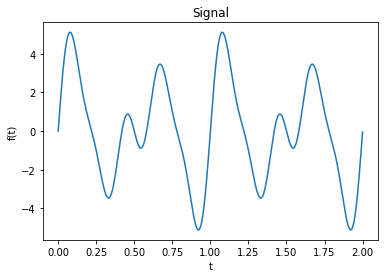

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def sine_wave_generator(frequency, t):

    y = np.sin(2 * np.pi * frequency * t)
    
    return y

sampling_rate = 2100
sampling_period = 1/sampling_rate
duration = 2

t = np.arange(0, duration, sampling_period) 

waveform = 3*sine_wave_generator(2, t) + sine_wave_generator(5, t) + 2*sine_wave_generator(3, t)

plt.plot(t, waveform)
plt.title('Signal')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()


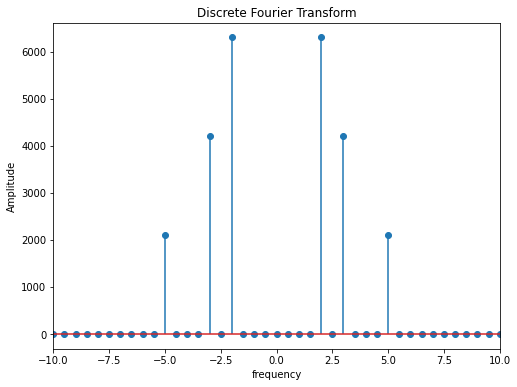

In [20]:


dft = np.fft.fft(waveform)

num_samples = sampling_rate * duration
xf = np.fft.fftfreq(num_samples, sampling_period)

plt.figure(figsize = (8, 6))
plt.stem(xf, np.abs(dft))
plt.xlim(-10, 10)
plt.title('Discrete Fourier Transform')
plt.xlabel('frequency')
plt.ylabel('Amplitude')
plt.show()

### <span style="color:red"> Exercise 10 </span>
Repeat exercise 9 with a different signal $f(t)$. This time, use the FFT command.

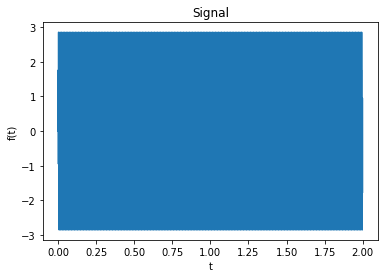

In [47]:
sampling_rate = 1000
sampling_period = 1/sampling_rate
duration = 2

t = np.arange(0, duration, sampling_period) 

waveform = sine_wave_generator(100, t) + 2*sine_wave_generator(400, t)

plt.plot(t, waveform)
plt.title('Signal')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

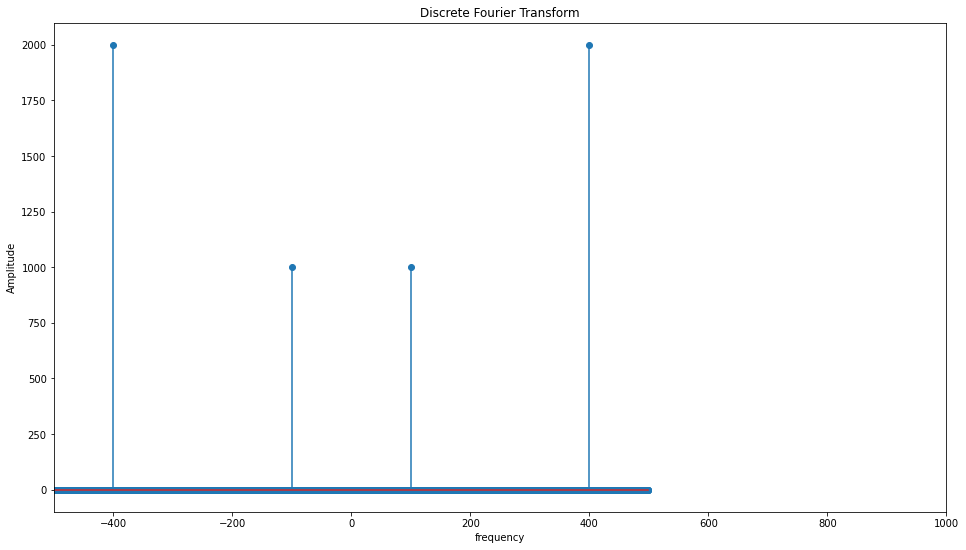

In [48]:
dft = np.fft.fft(waveform)

num_samples = sampling_rate * duration
xf = np.fft.fftfreq(num_samples, sampling_period)

plt.figure(figsize = (16, 9))
plt.stem(xf, np.abs(dft))
plt.xlim(-500, 1000)
plt.title('Discrete Fourier Transform')
plt.xlabel('frequency')
plt.ylabel('Amplitude')
plt.show()

## <span style="color:green;"> Reflection </span>

Do not skip this section! Assignment will be graded only on completing this section.

__1. What parts of the lab, if any, do you feel you did well? <br>
2. What are some things you learned today? <br>
3. Are there any topics that could use more clarification? <br>
4. Do you have any suggestions on parts of the lab to improve?__

<h3 style="background-color:lightblue"> Write Answers for the Reflection Below </h3>

1. I think I did most of the math well, as well as the coding in Exercise 10, that was the easy part.
2. I learned some shortcuts for finding the fourier coefficients of various wave forms.
3. I really didn't understand the difference between the F[k] coefficients and the $a_k$/$b_k$ coefficients.
4. I think if you could provide some additional resources for reading more about the Fourier concepts that would be helpful.